<b>Проект: </b>Анализ убытков приложения ProcrastinatePRO+

<b>Цель проекта</b> - найти причины убыточности компании, проанализировать их и помочь выйти компании в плюс.

#### Откроем файл с данными о визитах и подготовим их к анализу

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv') #сохраняем в датафрейм 
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [3]:
visits.columns = visits.columns.str.lower() # приводим названия заголовков к строчным буквам

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session start  309901 non-null  object
 5   session end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
# переименуем столцы в соответствии с общепринятыми нормами
visits.rename(columns={'user id': 'user_id', 'session start': 'session_start', 'session end':'session_end'}, inplace=True)
visits

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])# преобразуем данные о времени
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [7]:
visits.duplicated().sum()# проверим датайфрейм на дубликаты

0

In [8]:
visits.isna().sum()# проверим датайфрейм на наличие пропусков

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

#### Откроем файл с данными о заказах и подготовим их к анализу

In [9]:
orders = pd.read_csv('/datasets/orders_info_short.csv') #сохраняем в датафрейм 
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [10]:
orders.columns = orders.columns.str.lower() # приводим названия заголовков к строчным буквам

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user id   40212 non-null  int64  
 1   event dt  40212 non-null  object 
 2   revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [12]:
# переименуем столцы в соответствии с принятыми нормами
orders.rename(columns={'user id': 'user_id', 'event dt': 'event_dt'}, inplace=True)
orders.head()

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [13]:
orders['event_dt'] = pd.to_datetime(               # преобразуем данные о времени
    orders['event_dt'], format='%Y-%m-%dT%H:%M:%S'
)
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [14]:
orders.duplicated().sum()# проверим датайфрейм на дубликаты

0

In [15]:
orders.isna().sum()# проверим датайфрейм на наличие пропусков

user_id     0
event_dt    0
revenue     0
dtype: int64

#### Откроем файл с данными о рекламных расходах и подготовим их к анализу

In [16]:
costs = pd.read_csv('/datasets/costs_info_short.csv') #сохраняем в датафрейм 
costs.head(10)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
5,2019-05-06,FaceBoom,118.8
6,2019-05-07,FaceBoom,101.2
7,2019-05-08,FaceBoom,100.1
8,2019-05-09,FaceBoom,93.5
9,2019-05-10,FaceBoom,104.5


In [17]:
costs.columns = costs.columns.str.lower() # приводим названия заголовков к строчным буквам

In [18]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [19]:
costs['dt'] = pd.to_datetime(costs['dt']) # преобразуем данные о времени
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [20]:
costs.duplicated().sum()# проверим датайфрейм на дубликаты

0

In [21]:
costs.isna().sum()# проверим датайфрейм на наличие пропусков

dt         0
channel    0
costs      0
dtype: int64

<b>Подведем итог обзора данных:<b/>
- мы привели названия столбцов к общепринятому виду;
- изменили типы данных в соответсвии с их содержанием;
- проверили данные на наличие дубликатов: явных дубликатов не обнаружено;
- проверили данные на наличие пропусков. Пропусков не обнаружено. 

#### Зададим функции для вычисления значений метрик

In [22]:
#функция для создания профилей пользователей get_profiles()
#def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
def get_profiles(sessions, orders, ad_costs):
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
               # 'session_end': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
   # for event in event_names:
     #   if event in events['event_name'].unique():
      #      profiles[event] = profiles['user_id'].isin(
       #         events.query('event_name == @event')['user_id'].unique()
        #    )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [23]:
# функция для подсчёта Retention Rate get_retention()
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [24]:
# функция для подсчёта конверсии get_conversion()
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [25]:
# функция для подсчёта LTV get_ltv()
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Зададим функции для построения графиков: 

In [26]:
# функция для сглаживания данных filter_data()
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [27]:
# функция для построения графика Retention Rate plot_retention()
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [28]:
# функция для построения графика конверсии plot_conversion()
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [29]:
# plot_ltv_roi для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных



#### Составим профили пользователей

In [30]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [31]:
# Определим минимальную и максимальную даты привлечения пользователей:
min_analysis_date = profiles['dt'].min()
observation_date = profiles['dt'].max()  
print('Минимальная дата привлечения пользователей:', min_analysis_date)
print('Максимальная дата привлечения пользователей:', observation_date)

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


#### Выясним из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.

In [32]:
profiles.groupby('region').agg({'user_id': 'nunique', 'payer':['sum','mean']}).reset_index().\
sort_values(by=[('user_id','nunique')],ascending =False) 

region user_id payer          
                 nunique   sum      mean
3  United States  100002  6902  0.069019
2             UK   17575   700  0.039829
0         France   17450   663  0.037994
1        Germany   14981   616  0.041119

По полученным данным делаем вывод, что больше всего пользователей приходит из США и там же самый высокй процент платящих пользователей 6.9%. Меньше всего пользователей из Германии. Самый низкий процент платящих пользователей во Франции.

In [33]:
#Построим таблицу, отражающую количество пользователей и долю платящих для каждой страны.
region_pay = pd.DataFrame()
region_pay['users'] = profiles.groupby('region')['user_id'].count()
region_pay['users_perc'] = ((region_pay['users'] / profiles['region'].count()) * 100)
region_pay['payer'] = profiles.groupby('region').agg({'payer': 'sum'})
region_pay['payer_perc'] = ((region_pay['payer'] / profiles.query('payer == True')['region'].count()) * 100)
region_pay.sort_values(by='payer_perc', ascending=False).style.format({'payer_perc': '{:.2f}%'})

,users,users_perc,payer,payer_perc
region,,,,
United States,100002,66.664445,6902,77.72%
UK,17575,11.716042,700,7.88%
France,17450,11.632713,663,7.47%
Germany,14981,9.986801,616,6.94%


Если рассматривать доли платящих пользователей по странам, видим, что лидирует США. Оттуда 77.72% платящих пользователей. Меньшего всего пользователей приходит из Германии, 6.94%.

#### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.

In [34]:
profiles.groupby('device').agg({'user_id': 'nunique', 'payer':['sum','mean']}).reset_index().\
sort_values(by=[('user_id','nunique')],ascending =False) 

device user_id payer          
           nunique   sum      mean
3   iPhone   54479  3382  0.062079
0  Android   35032  2050  0.058518
2       PC   30455  1537  0.050468
1      Mac   30042  1912  0.063644

По полученным данным делаем вывод, что наибольшее количество пользователей - это владельцы iPhone, 6.2% среди них - это платящие пользователи. Наименьшее количество пользователей составляют владельцы Mac. Самый низкий процент платящих пользователей в разрезе типов устройств - у пользователей  PC, 5%.  

In [35]:
#Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
device_pay = pd.DataFrame()
device_pay['users'] = profiles.groupby('device')['user_id'].count()
device_pay['users_perc'] = ((device_pay['users'] / profiles['device'].count()) * 100)
device_pay['payer'] = profiles.groupby('device').agg({'payer': 'sum'})
device_pay['payer_perc'] = ((device_pay['payer'] / profiles.query('payer == True')['device'].count()) * 100)
device_pay.sort_values(by='payer_perc', ascending=False).style.format({'payer_perc': '{:.2f}%'})

,users,users_perc,payer,payer_perc
device,,,,
iPhone,54479,36.317396,3382,38.08%
Android,35032,23.353421,2050,23.08%
Mac,30042,20.026932,1912,21.53%
PC,30455,20.302251,1537,17.31%


Если рассматривать доли платящих пользователей по типам устройсв, видим, что лидируют владельцы iPhone, 38.08% платящих пользователей. Меньшего всего пользователей приходится на владельцев PC, 17.31%.

#### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

In [36]:
profiles.groupby('channel').agg({'user_id': 'nunique', 'payer':['sum','mean']}).reset_index().\
sort_values(by=[('user_id','nunique')],ascending =False) 

channel user_id payer          
                       nunique   sum      mean
10             organic   56439  1160  0.020553
1             FaceBoom   29144  3557  0.122049
6               TipTop   19561  1878  0.096007
4   OppleCreativeMedia    8605   233  0.027077
2              LeapBob    8553   262  0.030633
7       WahooNetBanner    8553   453  0.052964
5       RocketSuperAds    4448   352  0.079137
3         MediaTornado    4364   156  0.035747
8              YRabbit    4312   165  0.038265
0           AdNonSense    3880   440  0.113402
9       lambdaMediaAds    2149   225  0.104700

По полученным данным делаем вывод, что больше всего пользователей приходит через источник привлечения(channel) organic - органические пользователи, среди них 2% платящих пользователей. Наименьшее количество пользователей приходит через канал lambdaMediaAds. Самый высокий процент платящих пользователей среди пришедших через канал FaceBoom.

In [37]:
#Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала.
channel_pay = pd.DataFrame()
channel_pay['users'] = profiles.groupby('channel')['user_id'].count()
channel_pay['users_perc'] = ((channel_pay['users'] / profiles['channel'].count()) * 100)
channel_pay['payer'] = profiles.groupby('channel').agg({'payer': 'sum'})
channel_pay['payer_perc'] = ((channel_pay['payer'] / profiles.query('payer == True')['channel'].count()) * 100)
channel_pay.sort_values(by='payer_perc', ascending=False).style.format({'payer_perc': '{:.2f}%'})

,users,users_perc,payer,payer_perc
channel,,,,
FaceBoom,29144,19.428297,3557,40.05%
TipTop,19561,13.039971,1878,21.15%
organic,56439,37.623993,1160,13.06%
WahooNetBanner,8553,5.701696,453,5.10%
AdNonSense,3880,2.586529,440,4.95%
RocketSuperAds,4448,2.965175,352,3.96%
LeapBob,8553,5.701696,262,2.95%
OppleCreativeMedia,8605,5.736361,233,2.62%
lambdaMediaAds,2149,1.432590,225,2.53%


Если рассматривать доли платящих пользователей по источникам привлечения, видим, что лидируют пользователи, пришедшие через канал FaceBoom, 40.05%. Наименьшая доля платящих пользователей приходится на канал MediaTornado, 1.76%.

<b>Проведя исследовательский анализ, выяснили:<b/>
- наибольшее количество привлеченных пользователей приходится на США;
- наибольшая количество пользователей - владельцы iPhone;
- наибольшее количество пользователей приходит через источник привлечения(channel) organic.


- наибольшая часть платящих пользователей от общего числа так же приходится на США, 77.72%;
- наибольшая часть платящих пользователей от общего - владельцы iPhone, 38.08%;
- наибольшая часть платящих пользователей от общего - пользователи, пришедшие через источник привлечения(channel) FaceBoom, 40.05%.



### Маркетинг


#### Посчитаем общую сумму расходов на маркетинг

In [38]:
print('Общая сумма расходов на маркетинг, у.е.:', costs['costs'].sum().round(2))

Общая сумма расходов на маркетинг, у.е.: 105497.3


In [39]:
costs.head()

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


#### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник

In [40]:
costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by=['costs'], ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


Общая сумма расходов на маркетинг составила 105497.3 у.е. Наибольшие траты приходятся на каналы TipTop 54751.30 у.е. и FaceBoom - 32445.60 у.е. Наименьшие траты на каналы MediaTornado 954.48 у.е. и YRabbit у.е. 

#### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

In [41]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

Text(0, 0.5, 'расходы')

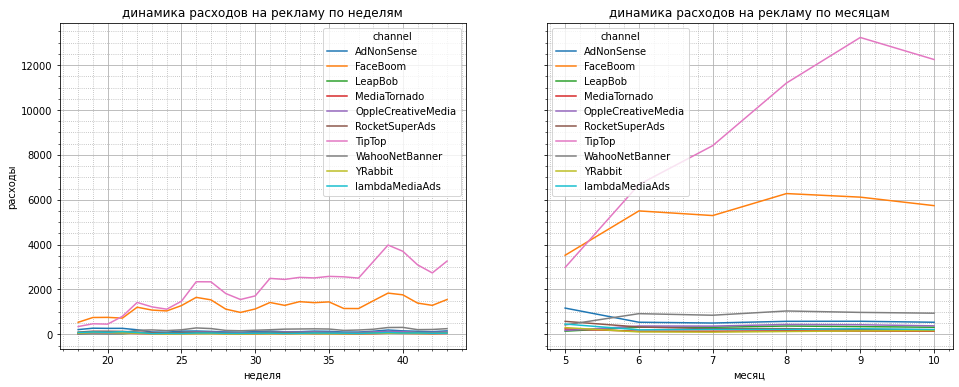

In [42]:
plt.figure(figsize=(16, 6))
ax1 = plt.subplot(1, 2, 1)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
costs.pivot_table(index='week', columns='channel', values='costs', aggfunc='sum').plot(grid=True, ax=ax1)

plt.title('динамика расходов на рекламу по неделям')
plt.xlabel('неделя')
plt.ylabel('расходы')
    
    # второй график 
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
costs.pivot_table(index='month', columns='channel', values='costs', aggfunc='sum').plot(grid=True, ax=ax2)
plt.title('динамика расходов на рекламу по месяцам')
plt.xlabel('месяц')
plt.ylabel('расходы')
    

Посмотрим на динамику заказов в целом

In [43]:
#orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders['week'] = orders['event_dt'].dt.isocalendar().week
orders['month'] = orders['event_dt'].dt.month
orders.head()

,user_id,event_dt,revenue,week,month
0,188246423999,2019-05-01 23:09:52,4.99,18,5
1,174361394180,2019-05-01 12:24:04,4.99,18,5
2,529610067795,2019-05-01 11:34:04,4.99,18,5
3,319939546352,2019-05-01 15:34:40,4.99,18,5
4,366000285810,2019-05-01 13:59:51,4.99,18,5


Text(588.4818181818181, 0.5, 'число заказов')

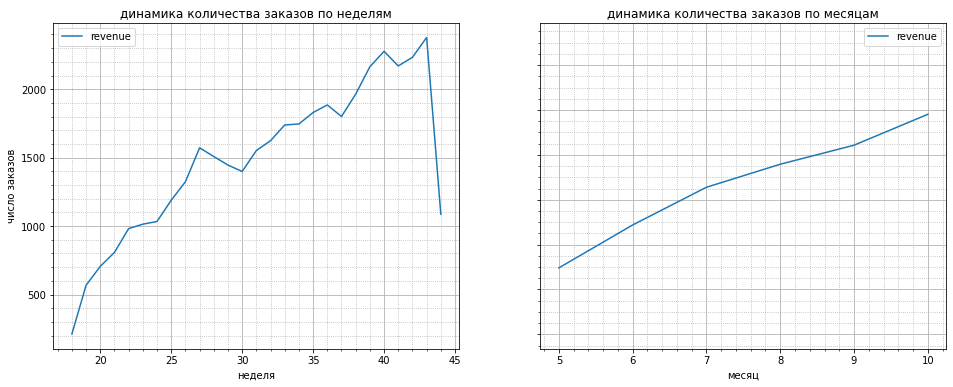

In [44]:
plt.figure(figsize=(16, 6))
ax3 = plt.subplot(1, 2, 1)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
orders.pivot_table(index='week',  values='revenue', aggfunc='count').plot(grid=True, ax=ax3)

plt.title('динамика количества заказов по неделям')
plt.xlabel('неделя')
plt.ylabel('число заказов')
    
    # второй график 
ax4 = plt.subplot(1, 2, 2, sharey=ax1)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
orders.pivot_table(index='month',  values='revenue', aggfunc='count').plot(grid=True, ax=ax4)
plt.title('динамика количества заказов по месяцам')
plt.xlabel('месяц')
plt.ylabel('число заказов')
#columns='channel'

In [45]:
orders.groupby('month')['revenue'].count()

month
5     2962
6     4875
7     6556
8     7582
9     8430
10    9807
Name: revenue, dtype: int64

In [46]:
orders.groupby('month')['revenue'].sum()

month
5     15787.38
6     26428.25
7     35988.44
8     40401.18
9     44941.70
10    52415.93
Name: revenue, dtype: float64

Text(0, 0.5, 'у.е.')

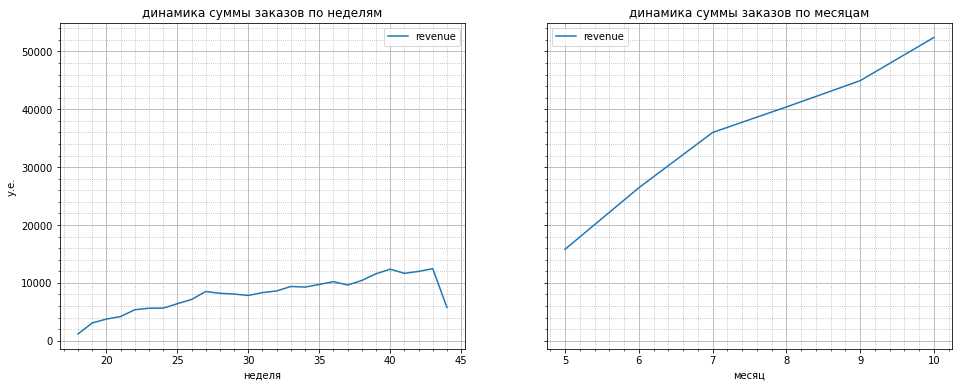

In [47]:
plt.figure(figsize=(16, 6))
ax11 = plt.subplot(1, 2, 1)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
orders.pivot_table(index='week',  values='revenue', aggfunc='sum').plot(grid=True, ax=ax11)

plt.title('динамика суммы заказов по неделям')
plt.xlabel('неделя')
plt.ylabel('у.е.')
    
    # второй график 
ax14 = plt.subplot(1, 2, 2, sharey=ax11)
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
orders.pivot_table(index='month',  values='revenue', aggfunc='sum').plot(grid=True, ax=ax14)
plt.title('динамика суммы заказов по месяцам')
plt.xlabel('месяц')
plt.ylabel('у.е.')

В целом количество заказов и сумма заказов растут, как и затраты на привлечение клиентов.

Из графиков динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику, видно, что расходы на каналы привлечения пользователей TipTop и FaceBoom изначально были больше, чем по другим источникам, и постепенно увеличивались с течением времени с мая по сентябрь и достигают максимума на 38 неделе: у TipTop - 4000 у.е., у FaceBoom - 1800 у.е. В сентябре траты на канал TipTop начали снижаться, а траты на канал FaceBoom начали снижаться с августа. Траты на остальные каналы значительно ниже и в основном постоянны после небольшого снижения в июне, из них можно выделить канал AdNonSense- изначально траты на него были чуть выше, но к июню так же снизились, а траты на канал WahooNetBanner подросли к июню и наблюдаются небольшие колебания величины затрат из месяца в месяц.

#### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

In [48]:
CAC_channel = pd.DataFrame()
CAC_channel['costs_channel'] = costs.groupby('channel')['costs'].sum()
CAC_channel ['user_channel'] = profiles.query('channel != "organic"').groupby('channel')['user_id'].count()
CAC_channel['cac'] = CAC_channel['costs_channel']/profiles.query('channel != "organic"').groupby('channel')['user_id'].count()
CAC_channel.sort_values(by=['cac'],ascending =False)

,costs_channel,user_channel,cac
channel,,,
TipTop,54751.30,19561,2.799003
FaceBoom,32445.60,29144,1.113286
AdNonSense,3911.25,3880,1.008054
lambdaMediaAds,1557.60,2149,0.724802
WahooNetBanner,5151.00,8553,0.602245
RocketSuperAds,1833.00,4448,0.412095
OppleCreativeMedia,2151.25,8605,0.250000
YRabbit,944.22,4312,0.218975
MediaTornado,954.48,4364,0.218717


Из расчетов видно, что в среднем привлечение одного пользователя (CAC) из источников TipTop (2.799003 у.е.), FaceBoom (1.113286 у.е.) и AdNonSense (1.008054 у.е.) стоило значительно больше, в сравнении с другими каналами привлечения. Самая низкая стоимость у источников LeapBob (0.210172 у.е.), MediaTornado	(0.218717 у.е.) и YRabbit (0.218975 у.е.)

In [49]:
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


In [50]:
costs.groupby('channel')['costs'].sum()

channel
AdNonSense             3911.25
FaceBoom              32445.60
LeapBob                1797.60
MediaTornado            954.48
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
TipTop                54751.30
WahooNetBanner         5151.00
YRabbit                 944.22
lambdaMediaAds         1557.60
Name: costs, dtype: float64

In [51]:
profiles.groupby('channel')['user_id'].count()

channel
AdNonSense             3880
FaceBoom              29144
LeapBob                8553
MediaTornado           4364
OppleCreativeMedia     8605
RocketSuperAds         4448
TipTop                19561
WahooNetBanner         8553
YRabbit                4312
lambdaMediaAds         2149
organic               56439
Name: user_id, dtype: int64

In [52]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


Итог:

Общая сумма расходов на маркетинг составила 105497.3 у.е. Наибольшие траты приходятся на каналы TipTop 54751.30 у.е. и FaceBoom - 32445.60 у.е. Наименьшие траты на каналы MediaTornado 954.48 у.е. и YRabbit 944.22 у.е. 
    
Из графиков динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику, видно, что расходы на каналы привлечения пользователей TipTop и FaceBoom изначально были больше и постепенно увеличивались с течением времени с мая по сентябрь (наблюдаем скачки затрат в июне, июле и сентябре), особенно траты на канал TipTop. В сентябре траты на канал TipTop начали снижаться, а траты на канал FaceBoom начали снижаться с августа. Траты на остальные каналы значительно ниже и в основном постоянны после небольшого снижения в июне, из них можно выделить канал AdNonSense - траты на него были чуть выше, но к июню так же снизились, а траты на канал WahooNetBanner подросли к июню и наблюдаются небольшие рост/падение из месяца в месяц.

Расчеты показали, что в среднем привлечение одного пользователя (CAC) из источников TipTop (2.799003 у.е.), FaceBoom (1.113286 у.е.) и AdNonSense (1.008054 у.е.) стоило значительно больше, в сравнении с другими каналами привлечения. Самая низкая стоимость у источников LeapBob (0.210172 у.е.), MediaTornado (0.218717 у.е.) и YRabbit (0.218975 у.е.)

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы. 
Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. 

#### Расчет LTV и ROI, графики динамики LTV, CAC и ROI

Установим момент и горизонт анализа данных: 

In [53]:
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 

Для анализа окупаемости рекламы исключим органических пользователей, т.к. на их привлечение нет трат. 

In [54]:
profiles_ltv = profiles.query('channel != "organic"')
profiles_ltv.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000


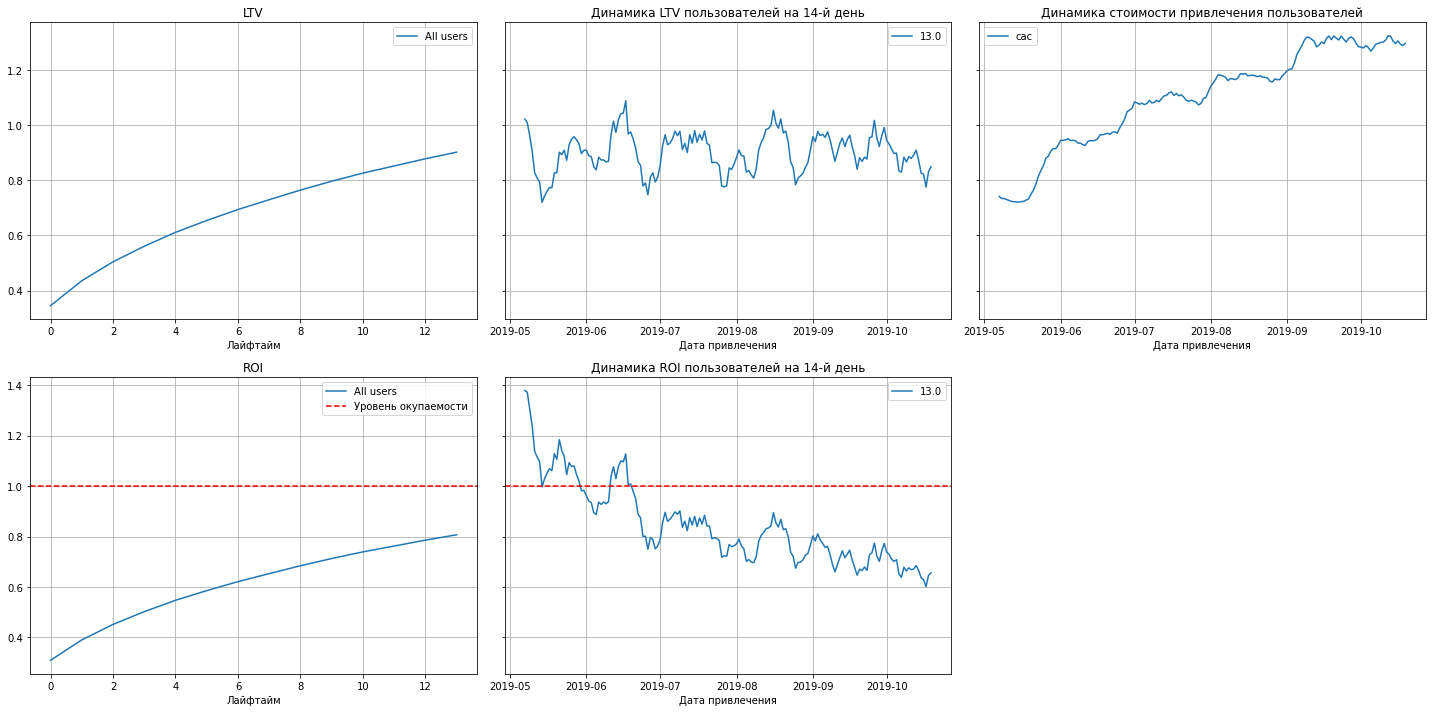

In [55]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ltv, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


Проанализировав графики, можно сказать, что кривая LTV постоянно растёт ожидаемым образом, динамика LTV достаточно стабильна. Реклама не окупается, ROI в конце второй недели чуть больше 80%, CAC растет, что говорит о увеличении рекламного бюджета со временем. Но это не приносит ожидаемого результата-увеличения прибыли.

#### Конверсия пользователей и динамика её изменения. Удержание пользователей

In [56]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_ltv, orders, observation_date, horizon_days
)

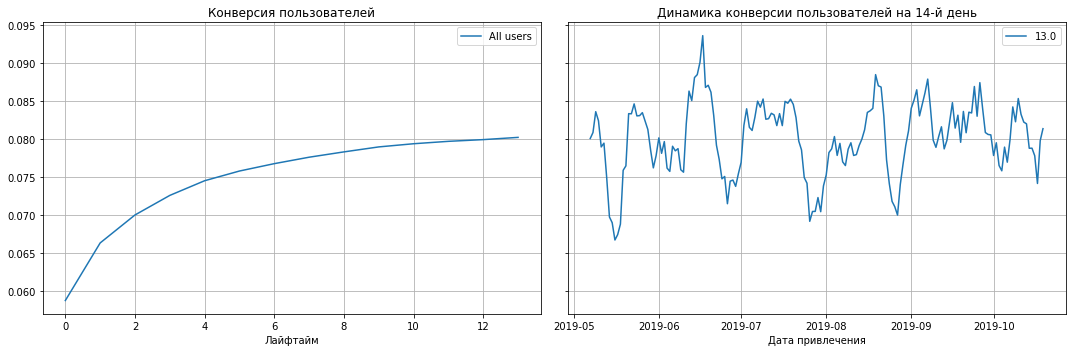

In [57]:
conversion_raw, conversion, conversion_history = get_conversion(
    profiles_ltv, orders, observation_date, horizon_days
)
plot_conversion(conversion, conversion_history, horizon_days, window=7)

Судя по графикам, пользователи конвертируются хорошо. Особенно хорошо конвертировались пользователи, привлеченные в середине июня.

Удержание пользователей:

In [58]:
retention_raw, retention, retention_history = get_retention(
    profiles_ltv,
    visits,
    observation_date, horizon_days
)

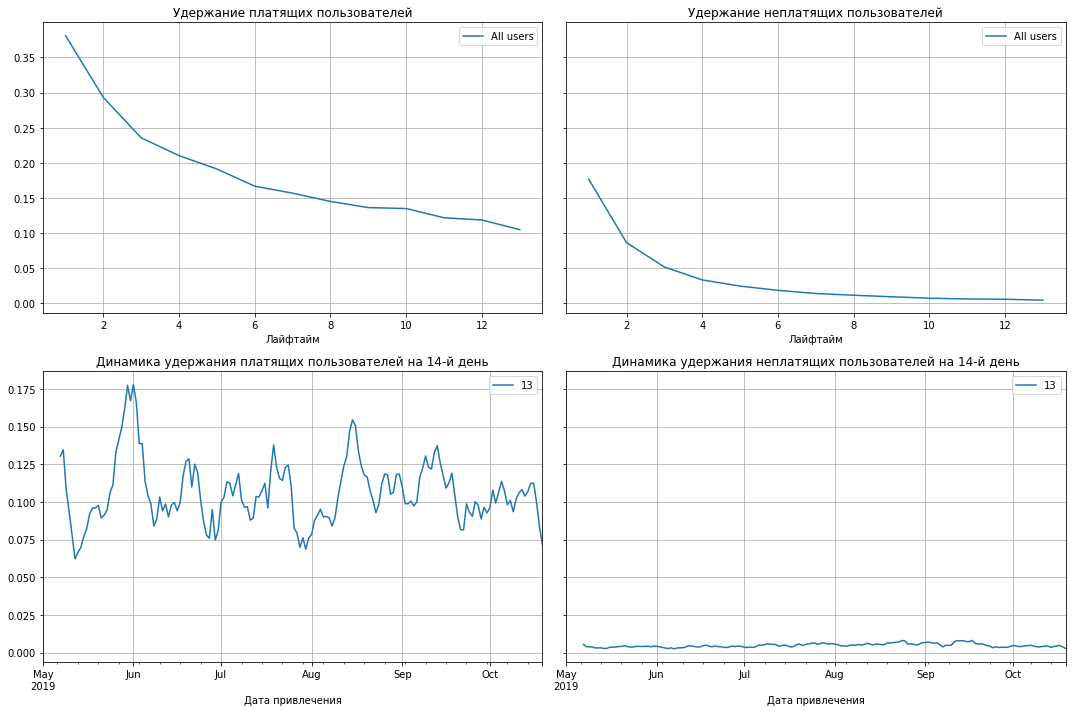

In [59]:
plot_retention(retention, retention_history, horizon_days, window=7)

Пользователи стабильно плохо удерживаются на протяжении 14 дней. Лучше всего платящие удерживались пользователи, привлеченные в конце мая и середине августа. Удержание неплатящих пользователей значительно ниже и убывает быстрее, чем удержание платящих: к середине второй недели их практически не остается.

Посмотрим на конверсию и удержание по странам, каналам и устройствам для уточнения выводов:

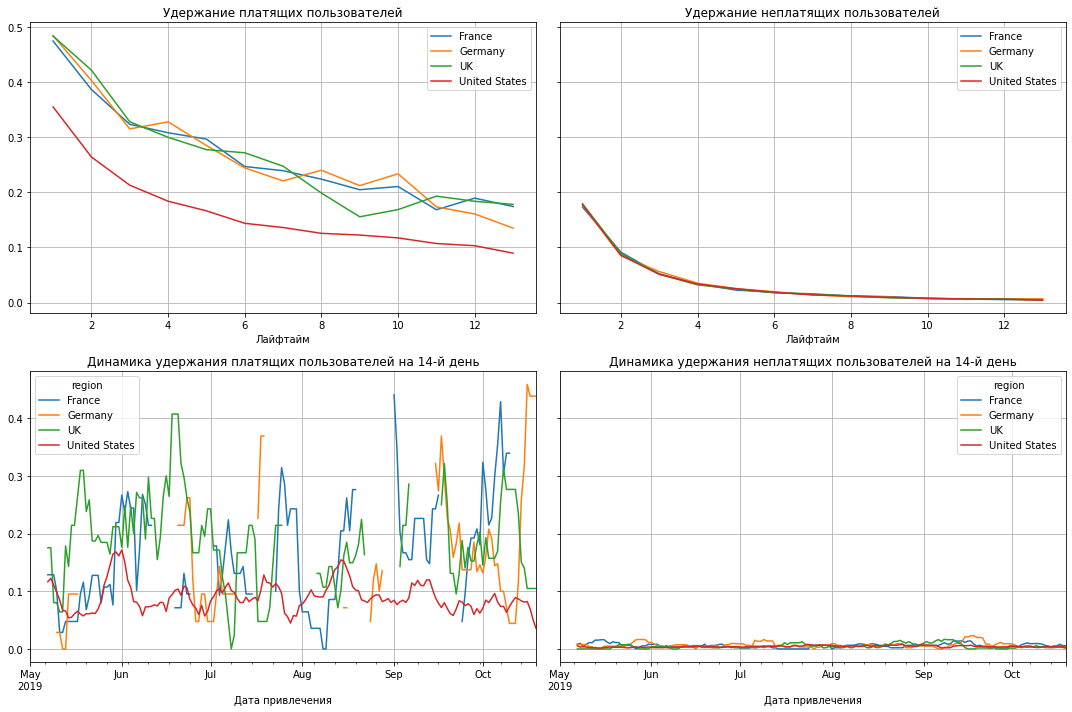

In [60]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_ltv, visits, observation_date, horizon_days, dimensions=['region']
)

plot_retention(retention_grouped, retention_history, horizon_days)

На графике удержания платящих пользователей наихудшая ситуация с удержание с пользователями из США. Удержание неплатящих пользователей значительно ниже и убывает быстрее (одинаково для всех стран), чем удержание платящих: к середине второй недели их практически не остается.

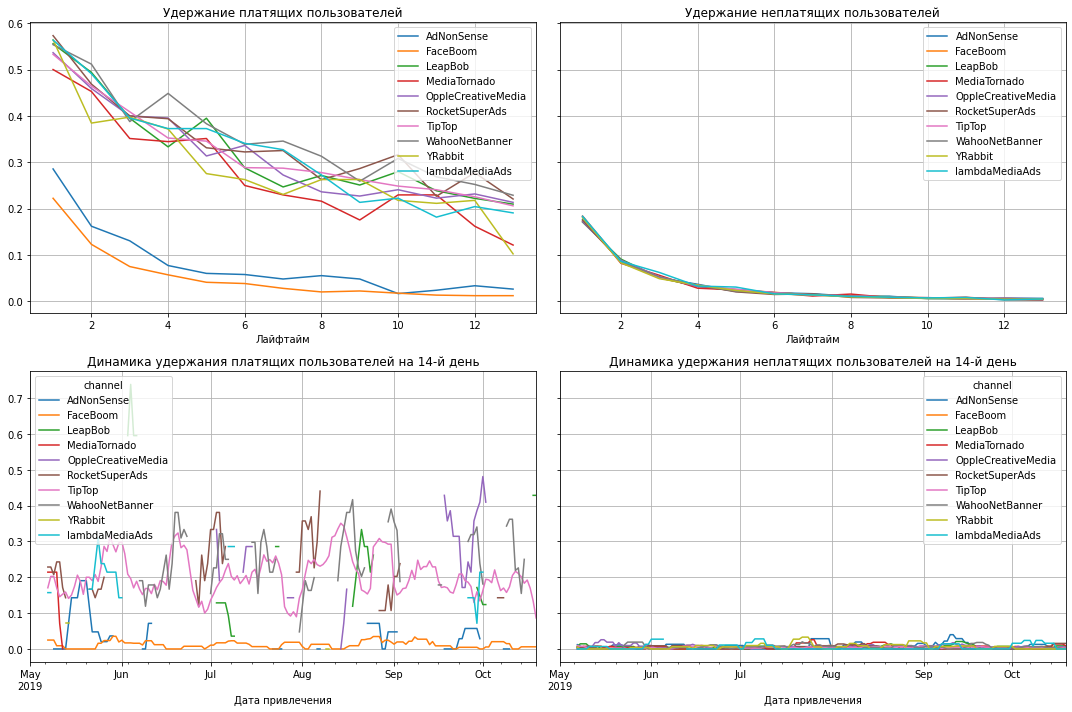

In [61]:
# смотрим удержание с разбивкой по каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles_ltv, visits, observation_date, horizon_days, dimensions=['channel']
)

plot_retention(retention_grouped, retention_history, horizon_days)

На графике удержания платящих пользователей выделяются 2 канала с низким % удержания FaceBoom и AdNonSense. К концу второй недели пользователй практически не возвращаются. Удержание неплатящих пользователей ниже и убывает быстрее (одинаково по всем каналам), чем удержание платящих: к началу второй недели их практически не остается.

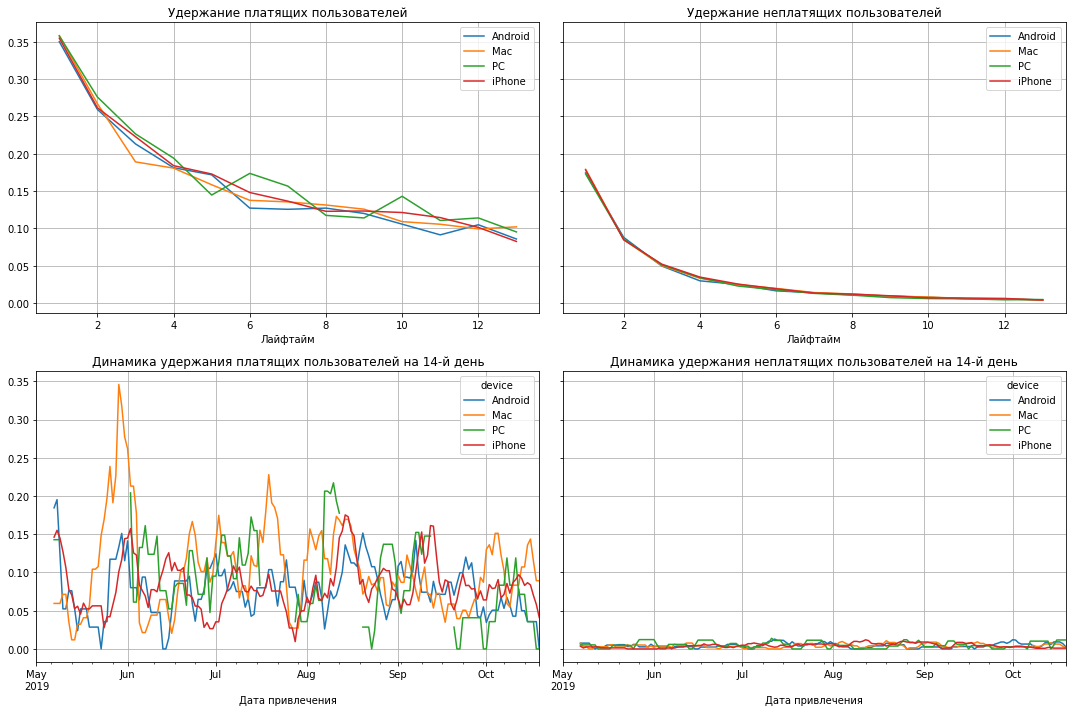

In [62]:
# смотрим удержание с разбивкой по устройствам в США
q2 = profiles_ltv.query('region =="United States" ')

retention_raw, retention_grouped, retention_history = get_retention(
    q2, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

Удержание платящих пользователей примерно одинаково для всех устройств, чуть лучше ситуация с Mac. Удержание неплатящих пользователей гораздо ниже и убывает быстрее (одинаково по всем устройствам), чем удержание платящих: к началу второй недели их практически не остается.

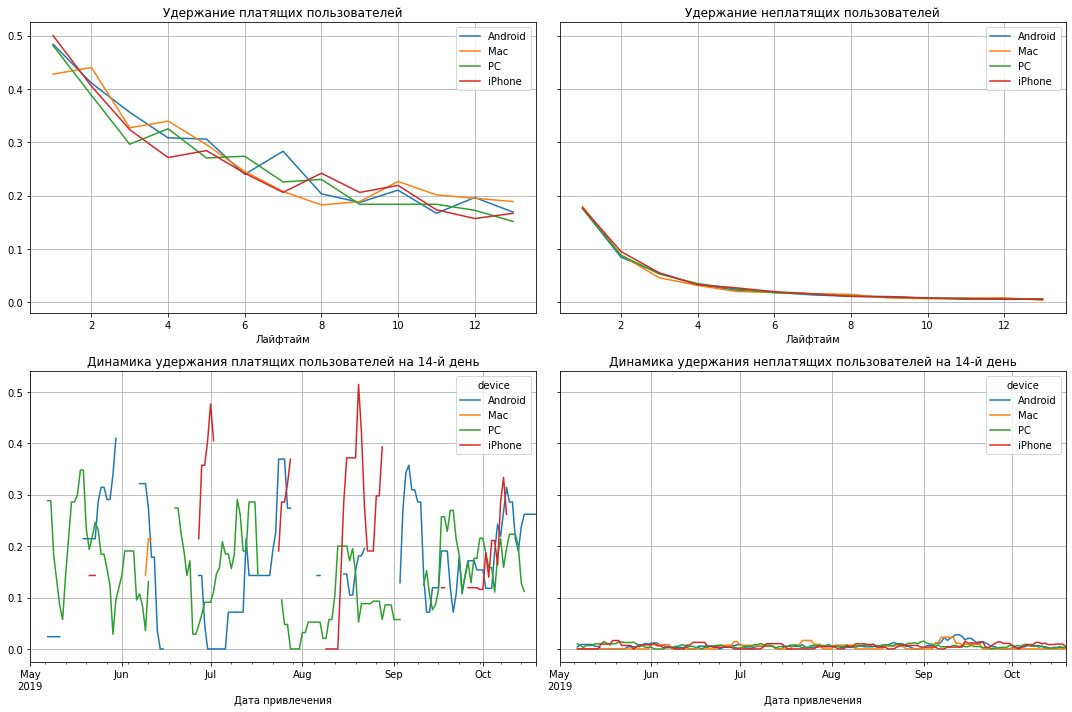

In [63]:
# смотрим удержание с разбивкой по устройствам исключая США
q4 = profiles_ltv.query('region !="United States" ')

retention_raw, retention_grouped, retention_history = get_retention(
    q4, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

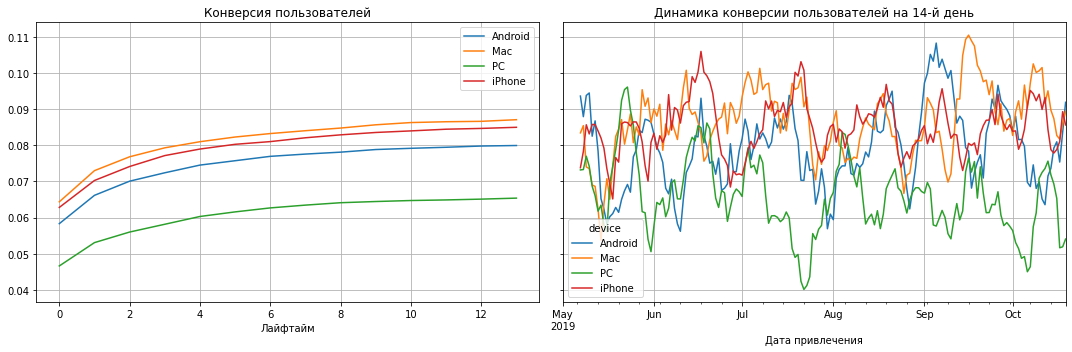

In [64]:
# смотрим конверсию с разбивкой по устройствам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ltv, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конвертирируются пользователи Android, Mac, iPhone примерно одинаково; выделяются пользователи РС, конвертация ниже. По графику динамики конверсии можно сказать, что пользователи Mac и iPhone конвертируются более стабильно и лучше, чем пользователи Android и PC. Наблюдаем более высокую конверсию у пользователей PC, привлеченных только в конце мая. Конверсия пользователей Mac и iPhone чаще всего выше в середине месяца.

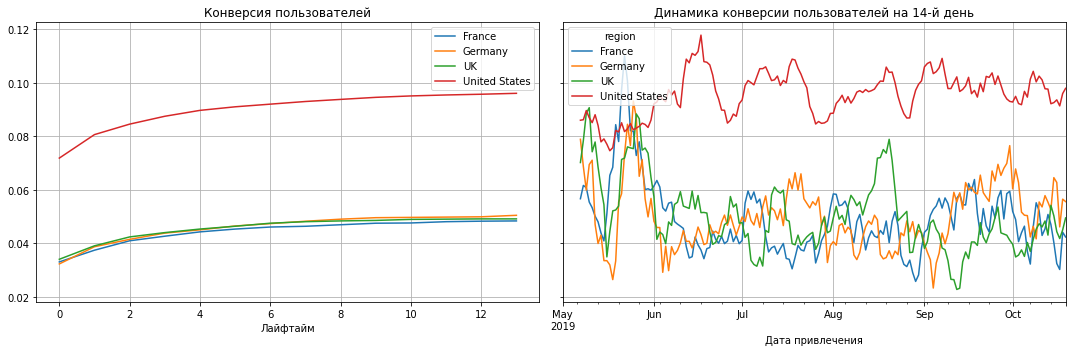

In [65]:
# смотрим конверсию с разбивкой по странам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ltv, orders, observation_date, horizon_days, dimensions=['region']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Пользователи из США значительно лучше конвертируются, чем пользователи из других стран. По графику динамики конверсии можно сказать, что пользователи из США конвертируются более стабильно и лучше, чем пользователи из Франции, Германии и Великобритании. Наблюдаем высокие скачки уровня конверсии у пользователей Франции, Германии и Великобритании, привлеченных в мае.

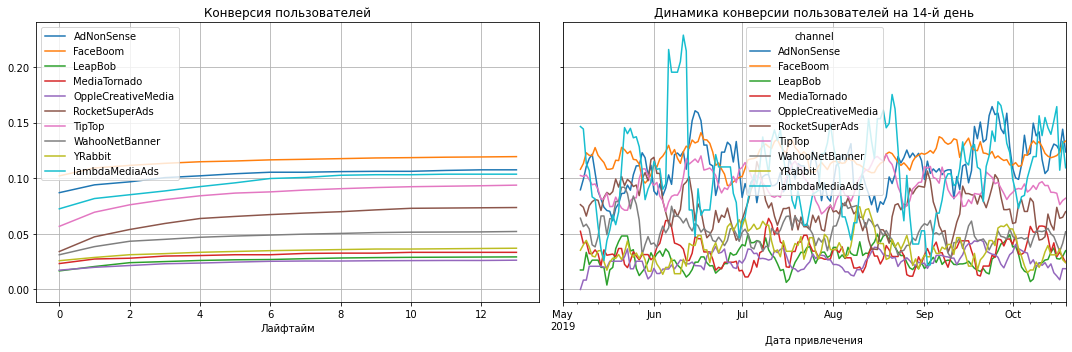

In [66]:
# смотрим конверсию с разбивкой по каналам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_ltv, orders, observation_date, horizon_days, dimensions=['channel']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Лучше конвертируются пользователи, пришедшие через каналы AdNonSense, FaceBoom, lambdaMediaAds, TipTop и RocketSuperAds. По графику динамики конверсии можно сказать, что пользователи конвертируются в основном стабильно. Выделяются каналы lambdaMediaAds, TipTop, RocketSuperAds и AdNonSense - имеются значительные скачки конверсии, в завмсимости от даты привлечения. 


#### Окупаемость рекламы с разбивкой по устройствам

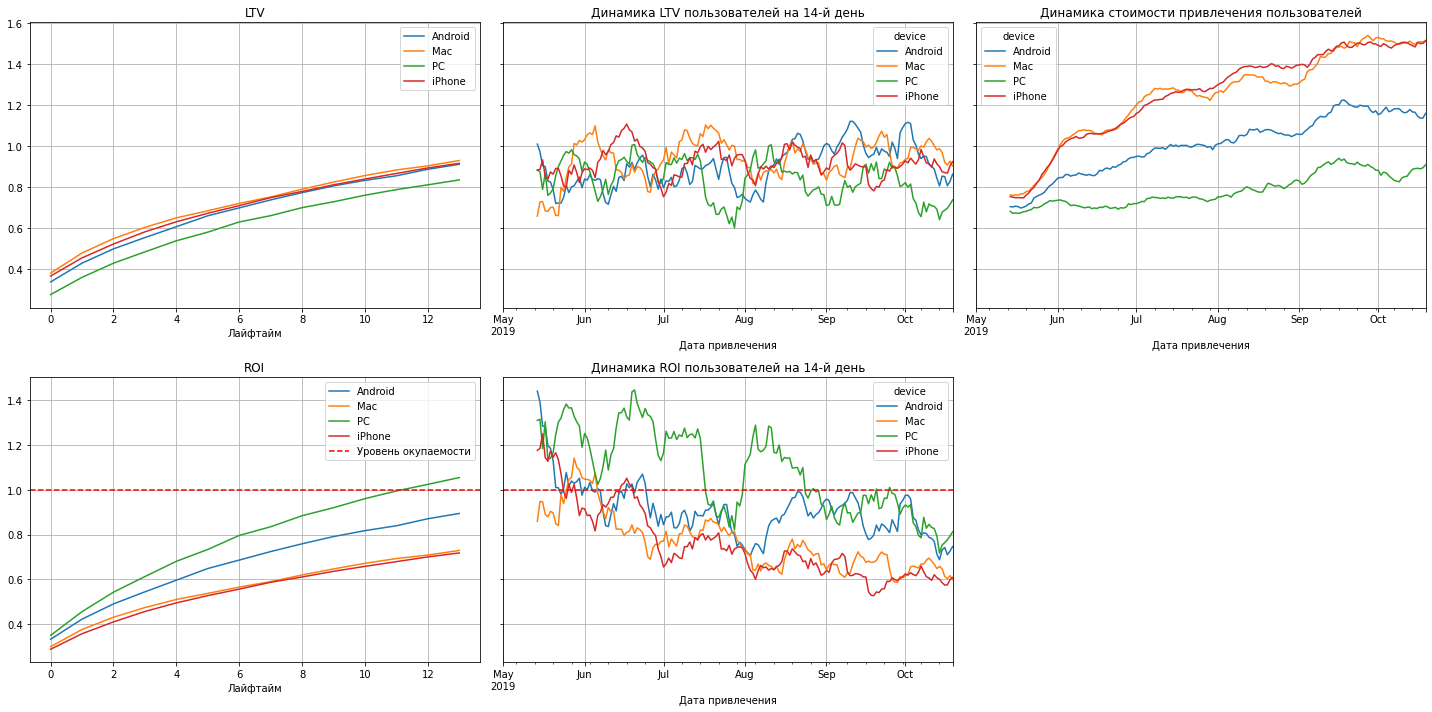

In [67]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ltv, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Пользователи PC окупаются почти к концу второй недели, а вот владельцы остальных устройств — нет. CAC растет по всем устройствам. В меньшей степени для PC, в большей степени для устройств MAC и iPhone. 

#### Окупаемость рекламы с разбивкой по странам

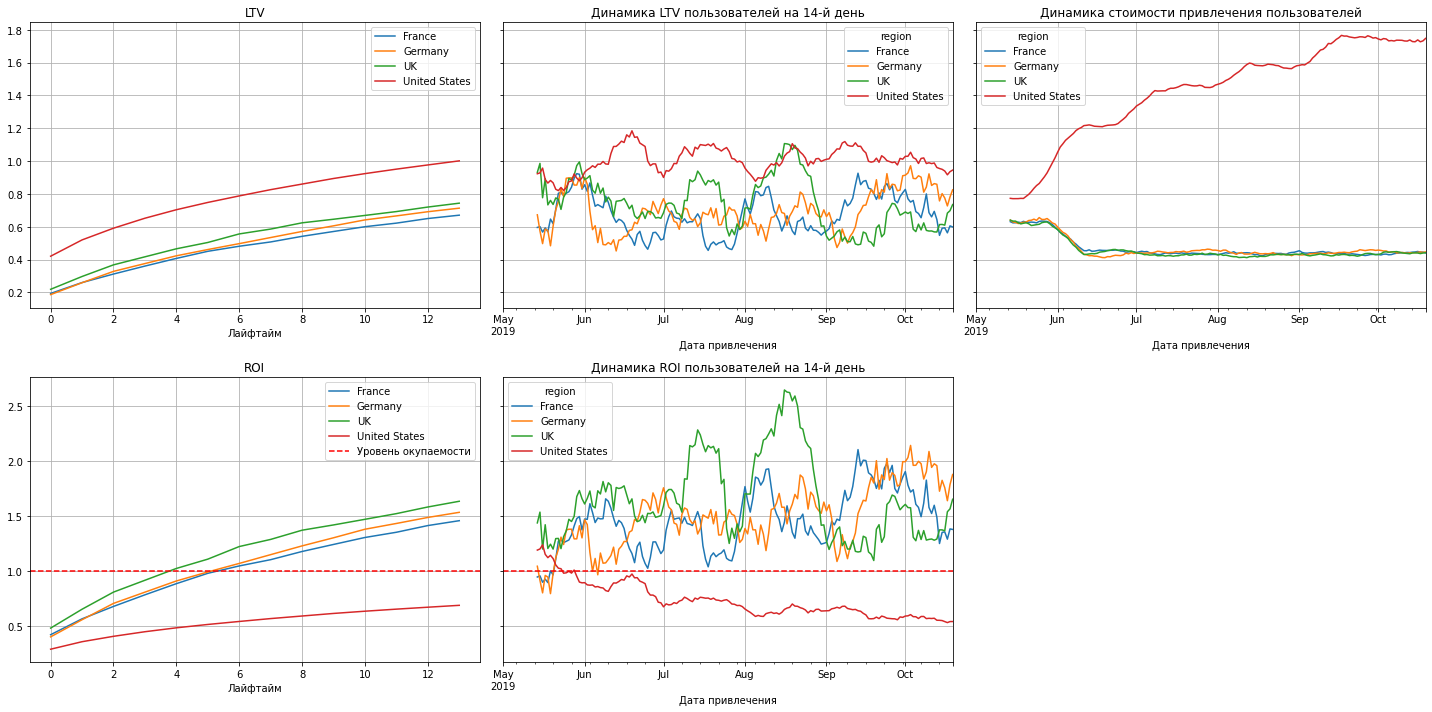

In [68]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ltv, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV всё так же подвержен сезонности, но стабилен. Пользователи из Франции, Германии и Великобритании стабильно окупаются, а вот из США — нет. CAC пользователей из США, в отличии от САС позьзователей из других стран, растет на протяжении всего времени. 

#### Окупаемость рекламы с разбивкой по рекламным каналам.

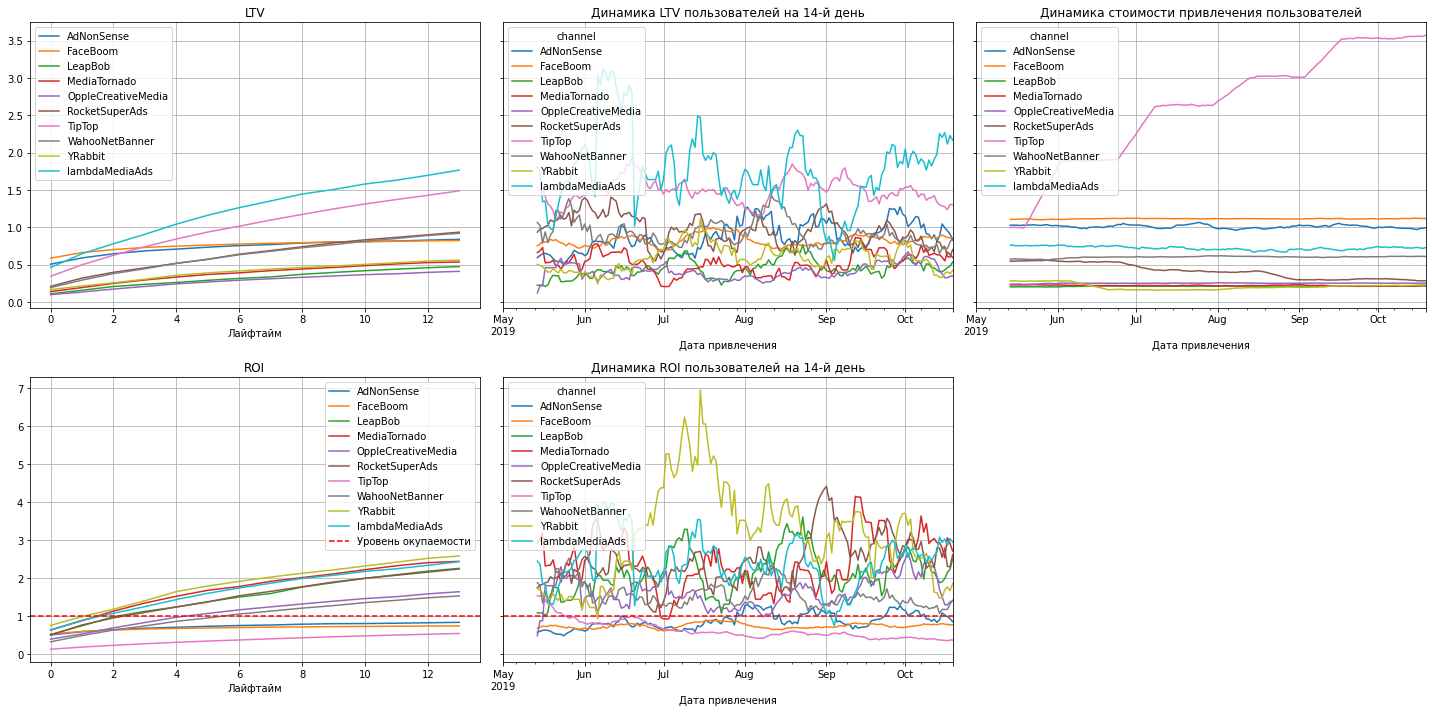

In [69]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_ltv, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Все каналы стабильно окупаются в течении 2-6 дней, кроме трех: TipTop, FaceBoom, AdNonSense- они не окупаются к концу второй недели.. САС пользователей стабилен по всем каналам, кроме САС канала TipTop - наблюдается рост.

Для рекомендаций в выводе рассмотрим некоторые каналы отдельно, так будет нагляднее.

In [70]:
w = profiles_ltv.query('channel in ["YRabbit", "MediaTornado", "RocketSuperAds"]')

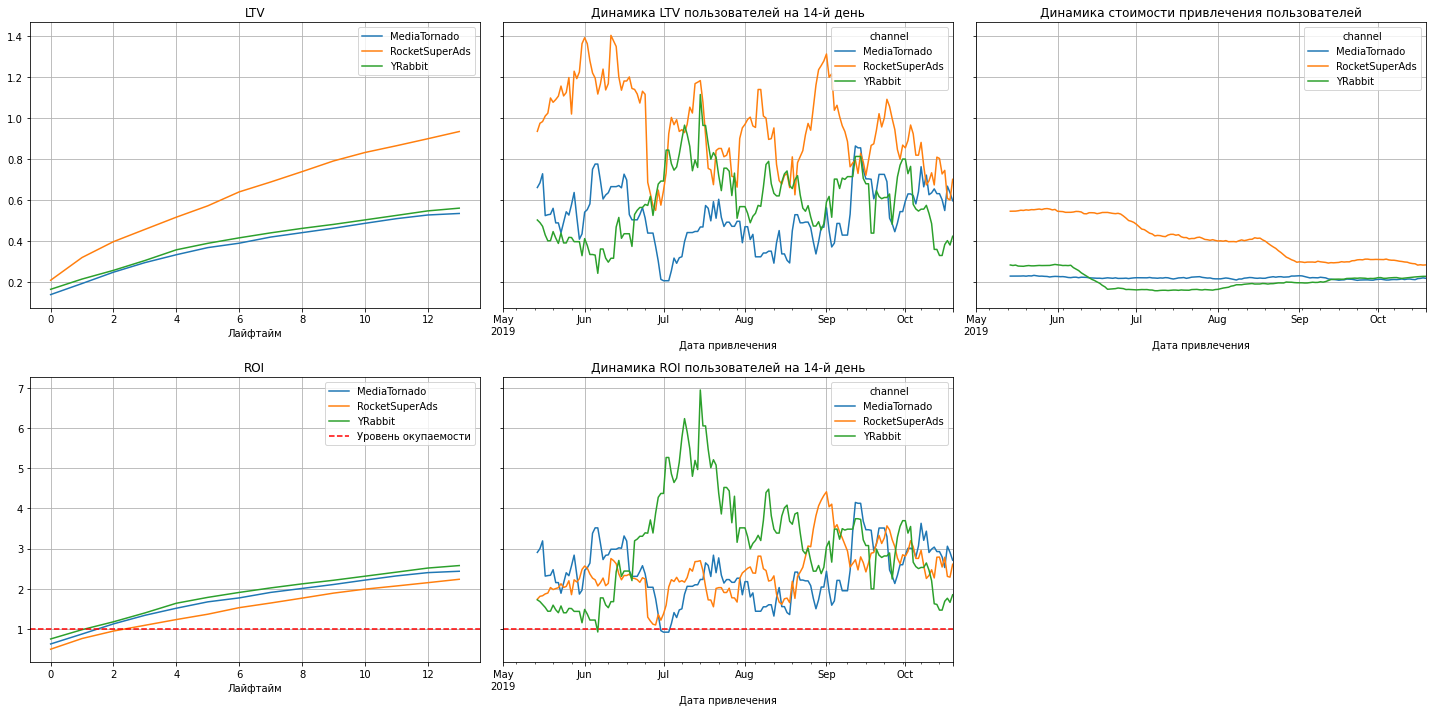

In [71]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    w, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

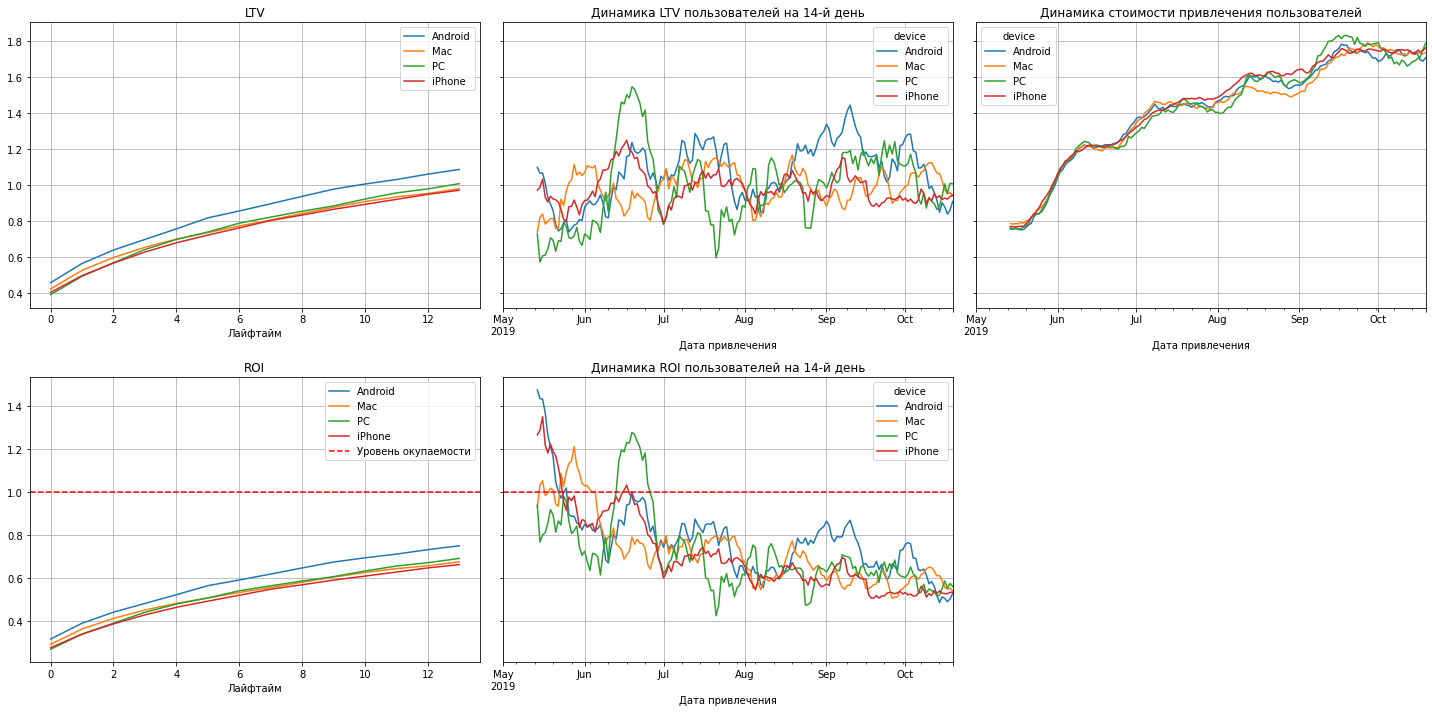

In [72]:
# смотрим окупаемость с разбивкой по устройствам, только США
q1 = profiles_ltv.query('region =="United States" ')
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    q1, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

In [73]:
p = profiles_ltv.query('channel in ["lambdaMediaAds", "OppleCreativeMedia", "WahooNetBanner", "LeapBob"]')

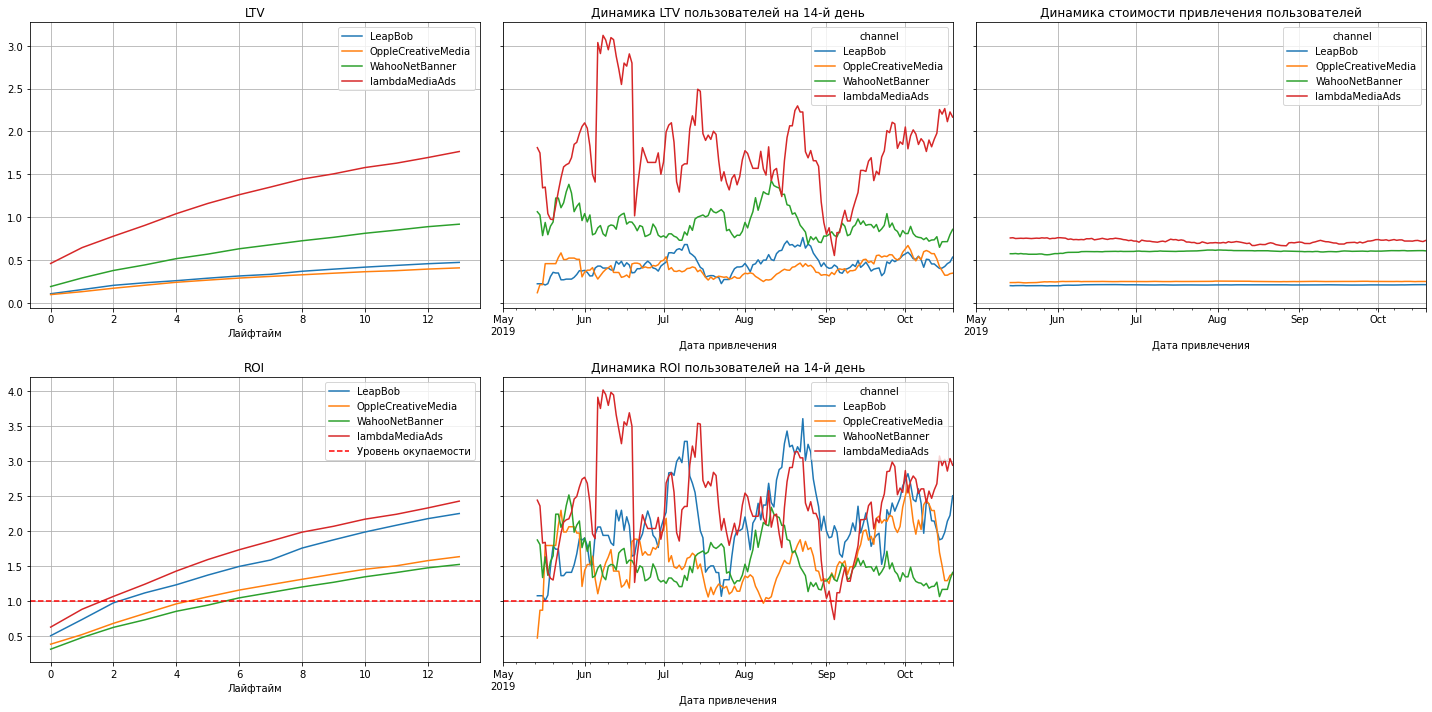

In [74]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    p, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

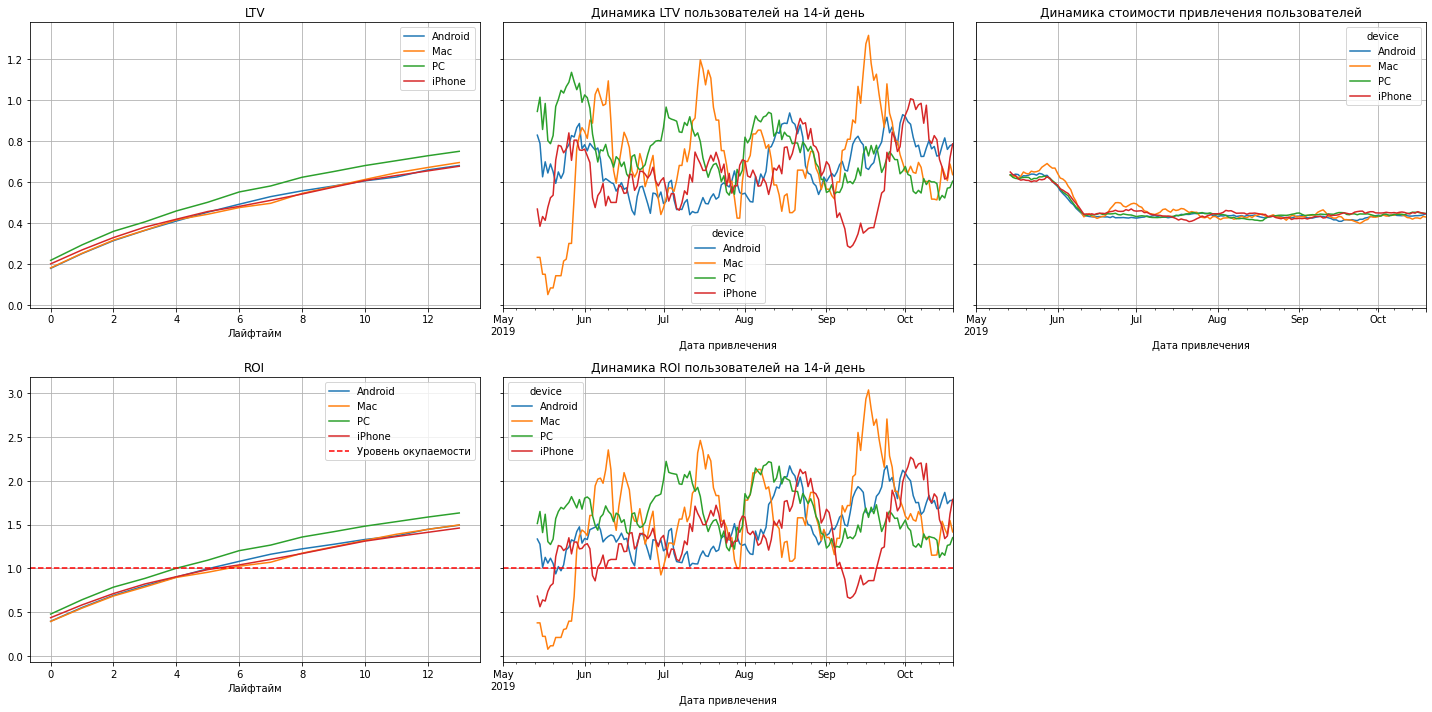

In [75]:
# смотрим окупаемость с разбивкой по устройствам, исключая США
q = profiles_ltv.query('region !="United States" ')
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    q, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Далее посмотрим на распределение пользователей по странам, каналам и устройствам. Так же проверим длительность сессий пользователей, пришедших через канал FaceBoom(здесь низкое удержание пользователей, может быть какая то техническая проблема)       

In [76]:
profiles_ltv.pivot_table(index=['region','channel'], values='user_id', aggfunc='count')# распределение по канала и странам

user_id
region        channel                    
France        AdNonSense             1366
              LeapBob                2988
              OppleCreativeMedia     2991
              WahooNetBanner         2971
              lambdaMediaAds          742
Germany       AdNonSense             1219
              LeapBob                2519
              OppleCreativeMedia     2562
              WahooNetBanner         2579
              lambdaMediaAds          649
UK            AdNonSense             1295
              LeapBob                3046
              OppleCreativeMedia     3052
              WahooNetBanner         3003
              lambdaMediaAds          758
United States FaceBoom              29144
              MediaTornado           4364
              RocketSuperAds         4448
              TipTop                19561
              YRabbit                4312

In [77]:
profiles_ltv.query('payer == True').\
pivot_table(index=['region','channel'], values='user_id', aggfunc='count')#платящие пользователи

user_id
region        channel                    
France        AdNonSense              150
              LeapBob                  90
              OppleCreativeMedia       80
              WahooNetBanner          152
              lambdaMediaAds           82
Germany       AdNonSense              142
              LeapBob                  69
              OppleCreativeMedia       64
              WahooNetBanner          148
              lambdaMediaAds           67
UK            AdNonSense              148
              LeapBob                 103
              OppleCreativeMedia       89
              WahooNetBanner          153
              lambdaMediaAds           76
United States FaceBoom               3557
              MediaTornado            156
              RocketSuperAds          352
              TipTop                 1878
              YRabbit                 165

In [78]:
# платящие пользователи из США
profiles_ltv.query('payer == True and region == "United States"').\
pivot_table(index=['region','channel', 'device'], values='user_id', aggfunc='count')

user_id
region        channel        device          
United States FaceBoom       Android      784
                             Mac          886
                             PC           357
                             iPhone      1530
              MediaTornado   Android       30
                             Mac           44
                             PC            17
                             iPhone        65
              RocketSuperAds Android       54
                             Mac           97
                             PC            33
                             iPhone       168
              TipTop         Android      409
                             Mac          439
                             PC           203
                             iPhone       827
              YRabbit        Android       40
                             Mac           41
                             PC            20
                             iPhone        64

In [79]:
profiles_ltv.query('payer == False and region == "United States"').\
pivot_table(index=['region','channel', 'device'], values='user_id', aggfunc='count')

user_id
region        channel        device          
United States FaceBoom       Android     5091
                             Mac         6379
                             PC          2651
                             iPhone     11466
              MediaTornado   Android      849
                             Mac         1061
                             PC           436
                             iPhone      1862
              RocketSuperAds Android      874
                             Mac         1040
                             PC           433
                             iPhone      1749
              TipTop         Android     3480
                             Mac         4381
                             PC          1809
                             iPhone      8013
              YRabbit        Android      825
                             Mac         1056
                             PC           462
                             iPhone      1804

In [80]:
# платящие пользователи канала, рекомендуем его в выводе
profiles_ltv.query('payer == True and channel == "lambdaMediaAds"').\
pivot_table(index=['region','channel', 'device'], values='user_id', aggfunc='count')

user_id
region  channel        device          
France  lambdaMediaAds Android       17
                       Mac            9
                       PC            30
                       iPhone        26
Germany lambdaMediaAds Android       18
                       Mac           10
                       PC            25
                       iPhone        14
UK      lambdaMediaAds Android       22
                       Mac            7
                       PC            32
                       iPhone        15

Посмотрим на суммы заказов пользователей канала TipTop:

In [81]:
ord2 = visits.query('channel=="TipTop" ')
o2=ord2['user_id'].tolist()#.sort_values(by=['user_id', 'session_start']).tail(60)
orders.query('user_id in @o2')['revenue'].value_counts().head(60)

4.99     13764
5.99       295
9.99       120
49.99       71
19.99       55
Name: revenue, dtype: int64

Для такого дорогого канала очень мало больших заказов.

Посмотрим на суммы заказов пользователей канала RocketSuperAds:

In [82]:
ord3 = visits.query('channel=="RocketSuperAds" ')
o3=ord3['user_id'].tolist()
orders.query('user_id in @o3')['revenue'].value_counts()

4.99     3681
5.99       81
9.99       35
49.99      15
19.99      12
Name: revenue, dtype: int64

Посмотрим на суммы заказов пользователей канала lambdaMediaAds:

In [83]:
ord7 = visits.query('channel=="lambdaMediaAds" ')
o7=ord7['user_id'].tolist()
orders.query('user_id in @o7')['revenue'].value_counts()


4.99     2373
5.99       41
9.99       24
49.99      19
19.99      15
Name: revenue, dtype: int64

Посмотрим на длительность сессий для платящих пользователей канала FaceBoom:

In [84]:
lists= orders['user_id'].tolist()

In [85]:
a = visits.query('channel=="FaceBoom" and user_id in @lists').sort_values(by=['user_id', 'session_start'])

In [89]:
a.head()

,user_id,region,device,channel,session_start,session_end,session_duration_sec
5537,599326,United States,Mac,FaceBoom,2019-05-07 20:58:57,2019-05-07 21:11:36,759
6247,599326,United States,Android,FaceBoom,2019-05-08 06:00:42,2019-05-08 06:52:28,3106
7045,599326,United States,Mac,FaceBoom,2019-05-09 07:33:16,2019-05-09 08:40:06,4010
42472,1053634008,United States,Android,FaceBoom,2019-06-14 11:12:33,2019-06-14 11:28:18,945
43144,1053634008,United States,Android,FaceBoom,2019-06-15 21:57:47,2019-06-15 22:10:59,792


In [87]:
# считаем ASL

a['session_duration_sec'] = (
    a['session_end'] - a['session_start']
).dt.seconds

print(a['session_duration_sec'].mean()) 

1803.2540073982736


Средняя длительность 30 минут, очень неплохо.

In [88]:
a.query('session_duration_sec<=180').sort_values(by=['session_duration_sec'])

,user_id,region,device,channel,session_start,session_end,session_duration_sec
163947,755871127592,United States,Mac,FaceBoom,2019-09-28 11:09:06,2019-09-28 11:09:06,0
138077,185342337792,United States,iPhone,FaceBoom,2019-09-08 01:49:46,2019-09-08 01:49:46,0
82544,912188621418,United States,Mac,FaceBoom,2019-07-22 04:28:55,2019-07-22 04:28:55,0
74814,30653671263,United States,Android,FaceBoom,2019-07-13 04:55:30,2019-07-13 04:55:30,0
34688,387714102782,United States,iPhone,FaceBoom,2019-06-05 16:03:34,2019-06-05 16:03:34,0
...,...,...,...,...,...,...,...
36920,447940808910,United States,Mac,FaceBoom,2019-06-07 16:41:17,2019-06-07 16:44:17,180
155007,505548617123,United States,Android,FaceBoom,2019-09-22 23:28:09,2019-09-22 23:31:09,180
117899,347682874165,United States,PC,FaceBoom,2019-08-22 19:28:57,2019-08-22 19:31:57,180
131436,853823033300,United States,PC,FaceBoom,2019-09-02 05:13:46,2019-09-02 05:16:46,180


Доля очень коротких сессий небольшая, около 10%. Тут всё в порядке.

Расчеты метрик показали, что в целом реклама, направленная на привлечение пользователей, не окупается. 
На это влияют: из какой страны пользователь, через какой канал пришел и с какого устройства. 

Стабильно окупаются пользователи PC, пользователи Android не окупаются, еще хуже с окупаемостью у пользователей MAC и iPhone. Если смотреть окупаемость по странам, то видим, что пользователи из Франции, Германии и Великобритании стабильно окупаются, а вот из США — нет. По каналам привлечения можно сказать, что стабильно окупаются все каналы, кроме трех: TipTop, FaceBoom, AdNonSense.
Из США приходит 66.7% всех пользователей и 77.7% платящих пользователей, логично, что из-за того, что пользователи из США, как показал анализ, не окупается, компания и терпит убытки. Для привлечения пользователей из США используются каналы(количество платящих пользователей): FaceBoom (3557), MediaTornado (156), RocketSuperAds (352), TipTop (1878), YRabbit	(165). Каналы,  через которые приходит большинство платящих пользователей (89% платящих пользователей США и 61.2% от всех платящих пользователей компании) очень дорогие, но реклама через эти каналы не окупаются на протяжении всего периода. Стоимость привлечения одного пользователя (САС) через канал TipTop 2.799003 у.е., а FaceBoom - 1.113286 у.е. Не смотря на то, что у канал FaceBoom САС ниже более чем в 2 раза, он не окупается еще и по причине низкого удержания пользователей.  

Вывод:
    
   В нашем распоряжении были данные о пользователях развлекательного приложения Procrastinate Pro+:  лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы. Данные были обработы для корректного проведения анализа (проверены на пропуски, дубликаты, типы данных приведены в соответствие с их содержимым). Данные за период с 01 мая 2019 г. по 
27 октября 2019 г.

Проведя исследовательский анализ, выяснили, что наибольшее количество привлеченных пользователей приложения приходится на США, пользователи из других трех стран дают по 7-11% процентов от общего числа пользователей.

Наибольшее количество пользователей приходит через источник привлечения(channel) organic 37,6%, канал обеспечивает 13.06% платящих пользоваталей приложения. Наибольшая количество пользователей приложения - владельцы iPhone.
При рассмотрении только платящих пользователей можно сказать, что наибольшая часть от общего числа так же приходится на США, 77.72%, это пользователи пришедшие в основном через источник привлечения(channel) FaceBoom, он опеспечивает 40.05% платящих пользователей приложения. Наибольшая часть платящих пользователей от общего - владельцы iPhone, 38.08%.

Общая сумма расходов компании на маркетинг составила 105497.3 у.е. Наибольшие траты приходятся на каналы TipTop 54751.30 у.е. и FaceBoom - 32445.60 у.е. Наименьшие траты на каналы MediaTornado - 954.48 у.е. и YRabbit - 944.22 у.е. 
Расходы на каналы привлечения пользователей TipTop и FaceBoom изначально были больше почти в 2 раза, чем расходы на другие каналы и постепенно увеличивались с течением времени, достигнув максимума на 38й недели 4000 у.е. и 1800 у.е. соответственно.   В сентябре траты на канал TipTop начали снижаться, а траты на канал FaceBoom начали снижаться с августа. Траты на остальные каналы в основном были постоянны, в течении периода оставались ниже уровня 500 у.е. Из них можно выделить канал AdNonSense - траты на него были чуть выше, но к июню снизились.

Расчеты показали, что в среднем привлечение одного пользователя (CAC) из источников TipTop (2.799003 у.е.), FaceBoom (1.113286 у.е.) и AdNonSense (1.008054 у.е.) стоило значительно больше, в сравнении с другими каналами привлечения. Самая низкая стоимость у источников LeapBob (0.210172 у.е.), MediaTornado (0.218717 у.е.) и YRabbit (0.218975 у.е.)

Расчеты метрик показали, что в целом реклама, направленная на привлечение пользователей, в течении 14 дней не окупается. ROI в конце второй недели чуть больше 80%. На это влияют: из какой страны пользователь, через какой канал пришел и с какого устройства.

Стабильно окупаются пользователи PC, пользователи Android не окупаются, еще хуже с окупаемостью у пользователей MAC и iPhone. Если смотреть окупаемость по странам, то видим, что пользователи из Франции, Германии и Великобритании стабильно окупаются, а вот из США — нет. По каналам привлечения можно сказать, что стабильно окупаются все каналы , кроме трех: TipTop, FaceBoom, AdNonSense. Из США приходит 66.7% всех пользователей и 77.7% платящих пользователей, логично, что из-за того, что пользователи из США, как показал анализ, не окупается, компания и терпит убытки. Для привлечения пользователей из США используются каналы(количество платящих пользователей): FaceBoom (3557), MediaTornado (156), RocketSuperAds (352), TipTop (1878), YRabbit (165). Каналы, через которые приходит большинство платящих пользователей FaceBoom и TipTop (обеспечивают 89% платящих пользователей США и 61.2% от всех платящих пользователей компании) очень дорогие, но реклама через эти каналы не окупаются на протяжении всего периода. Стоимость привлечения одного пользователя (САС) через канал TipTop 2.799003 у.е., а FaceBoom - 1.113286 у.е. Не смотря на то, что у канал FaceBoom САС ниже более чем в 2 раза, он не окупается еще и по причине низкого удержания пользователей. 
В качестве рекомендации для отдела маркетинга: необходимо перераспределить бюджет на рекламу в США, снизить затраты на каналы, через которые приходят большинство пользователей - это TipTop и FaceBoom. Рассмотреть канала RocketSuperAds. ПОльзователи, пришедшие через этот канал показывают лучшую конвертацию и удержание, в сравнении с другими каналами США MediaTornado и YRabbit.

Оказываться от каналов TipTop и FaceBoom совсем нельзя, т.к. через них приходит большая часть платящих пользователей. Возможно стоит пересмотреть минимальные тарифы (поднять с 4.99 у.е.), конверсия пользователей хорошая, люди готовы платить. Так же стимулировать рекламой, пробными бесплатными периодами, акциями к более дорогим покупкам. Обратить внимание на удержание пользователей: делать рассылки, акции, push-уведомления, чтобы пользователь постоянно возвращался в приложение и делал покупки.
Так же стоит обратить внимание на пользователей Мac и Android, у них хорошие показатели по удержанию и конверсии. Большая доля пользователей - это владельцы iPhone, но у них самый низкий показатель удержания. Здесь тоже необходимо привлекать внимание пользователя постоянно, как описано выше.

Затраты на рекламу во Франции, Германии и Великобритании окупаются в целом уже к концу первой недели. Тут можно порекомендовать так же перераспределить бюджет на рекламу между другими каналами. Канал AdNonSense дорого обходится компании, в среднем САС = 1 у.е., затраты на него не окупается, конвертируются пользователи хорошо, но показатель удержания очень низкий. Возможно помогут мероприятия по привлечению пользователей обратно в приложение (так же: рассылки, акции, промокоды). Траты можно перераспределить на канал WahooNetBanner ( САС = 0.6), через него приходит даже больше пользователей, чем через более дорогой канал - AdNonSense, и он дешевле, так же показатель удержания пользователей, пришедших через этот канал, высокий. Окупаемость уже к концу первой недели. Обратить внимание следует и на канал  lambdaMediaAds(САС=0.72), он показывает высокий доход и быструю окупаемость - уже к середине первой недели. Окупаемость рекламы в зависимости от устройства практически не меняется. В этих странах так же в качестве рекомендации: стимулировать рекламой, пробными бесплатными периодами, акциями к более дорогим покупкам, большинство покупок на сумму 4.9 у.е.